In [53]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split


In [54]:
df = np.genfromtxt('/content/Fertility_Diagnosis.txt', delimiter=',')

In [55]:
x = df[:, :-1]
y = df[:, -1].reshape(-1,1)
print(x.shape, y.shape, np.unique(y))

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state= 0)


(100, 9) (100, 1) [0. 1.]


In [56]:
input_size = x.shape[1]
output_size = y.shape[1]

In [57]:
error_tolerance = 0.05
learning_rate = 0.001

training_errors = []
testing_errors = []


In [58]:
for num_neurons in range(1, 10):
    print(f"Training with {num_neurons} neurons in hidden layer")

    weights_input_hidden_new = np.random.random((input_size, num_neurons))
    weights_hidden_output_new = np.random.random((num_neurons, output_size))

    for epoch in range(1, 1000001):
        layer_input_new = x_train
        layer_hidden_new = 1 / (1 + np.exp(-(np.dot(layer_input_new, weights_input_hidden_new))))
        layer_output_new = 1 / (1 + np.exp(-(np.dot(layer_hidden_new, weights_hidden_output_new))))

        error_new = y_train.reshape(-1, 1) - layer_output_new

        # Derivative of sigmoid: sigmoid(x) * (1 - sigmoid(x))
        layer_output_derivative_new = error_new * (layer_output_new * (1 - layer_output_new))
        layer_hidden_error_new = layer_output_derivative_new.dot(weights_hidden_output_new.T)
        layer_hidden_derivative_new = layer_hidden_error_new * (layer_hidden_new * (1 - layer_hidden_new))

        # Update weights
        weights_hidden_output_new += layer_hidden_new.T.dot(layer_output_derivative_new) * 0.001
        weights_input_hidden_new += layer_input_new.T.dot(layer_hidden_derivative_new) * 0.001

        if epoch % 100000 == 0:
            print(f"Epoch {epoch}, Corresponding Error: {np.mean(np.abs(error_new))}")

        if np.mean(np.abs(error_new)) < error_tolerance:
            print(f"Converged at epoch {epoch}, Error: {np.mean(np.abs(error_new))} \n")
            break

        if epoch == 1000000:
            print("Model did not converge \n")

    # Training results
    layer_input_new = x_train
    layer_hidden_new = 1 / (1 + np.exp(-(np.dot(layer_input_new, weights_input_hidden_new))))
    layer_output_new = 1 / (1 + np.exp(-(np.dot(layer_hidden_new, weights_hidden_output_new))))

    train_error_new = np.mean(np.square(y_train.reshape(-1, 1) - layer_output_new))
    training_errors.append(train_error_new)
    print(f"Training Mean Squared Error: {train_error_new}")

    # Testing results
    layer_input_new = x_test
    layer_hidden_new = 1 / (1 + np.exp(-(np.dot(layer_input_new, weights_input_hidden_new))))
    layer_output_new = 1 / (1 + np.exp(-(np.dot(layer_hidden_new, weights_hidden_output_new))))

    test_error_new = np.mean(np.square(y_test.reshape(-1, 1) - layer_output_new))
    testing_errors.append(test_error_new)
    print(f"Testing Mean Squared Error: {test_error_new}")


Training with 1 neurons in the hidden layer
Epoch 100000, Corresponding Error: 0.1675926727817341
Epoch 200000, Corresponding Error: 0.16589119596640614
Epoch 300000, Corresponding Error: 0.1643946091793576
Epoch 400000, Corresponding Error: 0.1632744379663421
Epoch 500000, Corresponding Error: 0.16240084393899115
Epoch 600000, Corresponding Error: 0.16169849438579972
Epoch 700000, Corresponding Error: 0.16112063207138286
Epoch 800000, Corresponding Error: 0.16063508743233154
Epoch 900000, Corresponding Error: 0.160217750488757
Epoch 1000000, Corresponding Error: 0.15984892722464875
Model did not converge 

Training Mean Squared Error: 0.08151322511694374
Testing Mean Squared Error: 0.07395011580472041
Training with 2 neurons in the hidden layer
Epoch 100000, Corresponding Error: 0.15299105819657877
Epoch 200000, Corresponding Error: 0.11012240749618052
Epoch 300000, Corresponding Error: 0.09029740528418936
Epoch 400000, Corresponding Error: 0.08270426452499027
Epoch 500000, Correspond

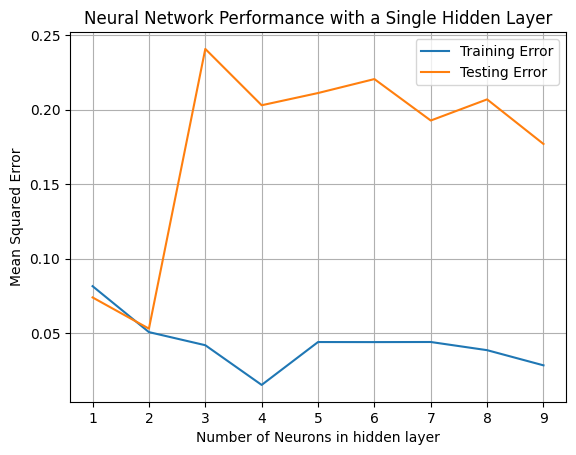

In [59]:
# Plot
plt.plot(range(1, 10), training_errors, label='Training Error')
plt.plot(range(1, 10), testing_errors, label='Testing Error')
plt.xlabel('Number of Neurons in hidden layer')
plt.ylabel('Mean Squared Error')
plt.title('Neural Network Performance with a Single Hidden Layer')
plt.legend()
plt.grid()
plt.show()